In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# read expression data
expr = pd.read_csv('data/TCGA.HNSC.expression.txt', sep='\t', header=0, index_col=[0,1])
print("expression data shape: ", expr.shape)
# read meta data
meta = pd.read_csv('data/TCGA.HNSC.metadata.txt', sep='\t', header=0, index_col=0)
print("meta data shape: ", meta.shape)
# get meta data per sample
meta = expr.reset_index()[['patient_id','sample_id']].join(meta, on='patient_id').set_index(['patient_id','sample_id'])
print("meta data shape: ", meta.shape)
meta.head()


expression data shape:  (545, 20531)
meta data shape:  (500, 18)
meta data shape:  (545, 18)


,,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,histological_type,histological_grade,tumor_status,vital_status,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
patient_id,sample_id,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J,TCGA-4P-AA8J-01A-11R-A39I-07,HNSC,66.0,MALE,BLACK OR AFRICAN AMERICAN,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,TUMOR FREE,Alive,0.0,102.0,0.0,102.0,NaN,NaN,0.0,102.0,NaN
TCGA-BA-4074,TCGA-BA-4074-01A-01R-1436-07,HNSC,69.0,MALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G3,WITH TUMOR,Dead,1.0,462.0,1.0,462.0,NaN,NaN,1.0,396.0,NaN
TCGA-BA-4075,TCGA-BA-4075-01A-01R-1436-07,HNSC,49.0,MALE,BLACK OR AFRICAN AMERICAN,Stage III,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,283.0,1.0,283.0,NaN,NaN,1.0,236.0,NaN
TCGA-BA-4076,TCGA-BA-4076-01A-01R-1436-07,HNSC,39.0,MALE,WHITE,[Not Available],Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,415.0,1.0,415.0,NaN,NaN,1.0,286.0,NaN
TCGA-BA-4077,TCGA-BA-4077-01B-01R-1436-07,HNSC,45.0,FEMALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,1134.0,1.0,1134.0,NaN,NaN,1.0,1134.0,NaN


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
import umap
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score


# Handle missing values in metadata
metadata = meta.fillna("Unknown")






/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
label_group=meta.columns[7]
meta["tumor_status"].values

array(['TUMOR FREE', 'WITH TUMOR', 'WITH TUMOR', 'WITH TUMOR',
       'WITH TUMOR', 'WITH TUMOR', 'WITH TUMOR', 'TUMOR FREE',
       'TUMOR FREE', 'WITH TUMOR', 'TUMOR FREE', 'TUMOR FREE',
       'TUMOR FREE', 'TUMOR FREE', 'WITH TUMOR', 'WITH TUMOR',
       'TUMOR FREE', nan, 'WITH TUMOR', 'WITH TUMOR', 'WITH TUMOR',
       'TUMOR FREE', 'TUMOR FREE', 'TUMOR FREE', 'TUMOR FREE',
       'WITH TUMOR', 'WITH TUMOR', 'TUMOR FREE', 'WITH TUMOR',
       'WITH TUMOR', 'TUMOR FREE', 'WITH TUMOR', 'WITH TUMOR',
       'WITH TUMOR', 'TUMOR FREE', 'TUMOR FREE', 'WITH TUMOR',
       'TUMOR FREE', 'WITH TUMOR', 'WITH TUMOR', 'WITH TUMOR',
       'TUMOR FREE', 'TUMOR FREE', 'TUMOR FREE', 'WITH TUMOR',
       'TUMOR FREE', 'WITH TUMOR', 'WITH TUMOR', 'TUMOR FREE',
       'WITH TUMOR', 'TUMOR FREE', 'TUMOR FREE', 'TUMOR FREE',
       'TUMOR FREE', 'WITH TUMOR', 'TUMOR FREE', 'TUMOR FREE',
       'TUMOR FREE', 'TUMOR FREE', 'WITH TUMOR', 'TUMOR FREE',
       'TUMOR FREE', 'TUMOR FREE', 'WITH TUMOR', '

In [11]:
label_group = meta[(meta.shape[0] - 12): (meta.shape[0] - 11)] 
label_group

,,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,histological_type,histological_grade,tumor_status,vital_status,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
patient_id,sample_id,,,,,,,,,,,,,,,,,,
TCGA-UF-A7JF,TCGA-UF-A7JF-01A-11R-A34R-07,HNSC,80.0,MALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,TUMOR FREE,Alive,0.0,1686.0,0.0,1686.0,NaN,NaN,0.0,1686.0,NaN


In [109]:
from anndata import read_h5ad
adata = read_h5ad('data/TCGA.HNSC.embedded.h5ad')
embedding_pca=adata.obsm['pca'] # PCA embedding
embedding_mds=adata.obsm['mds']
embedding_tsne=adata.obsm['tsne']
embedding_umap=adata.obsm['umap']

In [26]:
import sys 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from openTSNE import TSNE
import umap

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
import hdbscan
from sklearn import mixture

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score

from time import time
import seaborn as sns
filename = 'graph.csv'
# set the number of clusters as the number of groups in data
num_clusters = 4


# K-means
km = KMeans(n_clusters = num_clusters, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
kmeans_umap = km.fit_predict(embedding_umap)
kmeans_tsne = km.fit_predict(embedding_tsne)
kmeans_mds = km.fit_predict(embedding_mds)
kmeans_pca = km.fit_predict(embedding_pca)

# Hierarchical clustering:  AgglomerativeClustering
clusterer_hierarchical = AgglomerativeClustering(n_clusters = num_clusters )
hc_umap = clusterer_hierarchical.fit_predict(embedding_umap)
hc_tsne = clusterer_hierarchical.fit_predict(embedding_tsne)
hc_mds = clusterer_hierarchical.fit_predict(embedding_mds)
hc_pca = clusterer_hierarchical.fit_predict(embedding_pca)

# SpectralClustering
spectral_Clustering = SpectralClustering(n_clusters = num_clusters, assign_labels="discretize", random_state=0)
spc_umap = spectral_Clustering.fit_predict(embedding_umap)
spc_tsne = spectral_Clustering.fit_predict(embedding_tsne)
spc_mds = spectral_Clustering.fit_predict(embedding_mds)
spc_pca = spectral_Clustering.fit_predict(embedding_pca)

# Gaussian mixture model
gmm = mixture.GaussianMixture(n_components = num_clusters, covariance_type='full', reg_covar=1e-4)
gmm_umap = gmm.fit_predict(embedding_umap)
gmm_tsne = gmm.fit_predict(embedding_tsne)
gmm_mds = gmm.fit_predict(embedding_mds)
gmm_pca = gmm.fit_predict(embedding_pca)


# HDBSCAN
clusterer_hdbscan = hdbscan.HDBSCAN(min_cluster_size = 10, gen_min_span_tree=True)
hdbscan_umap = clusterer_hdbscan.fit_predict(embedding_umap)
hdbscan_tsne = clusterer_hdbscan.fit_predict(embedding_tsne)
hdbscan_mds = clusterer_hdbscan.fit_predict(embedding_mds)
hdbscan_pca = clusterer_hdbscan.fit_predict(embedding_pca)

#clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', edge_alpha=0.6, node_size=80, edge_linewidth=2)
#clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
#clusterer.condensed_tree_.plot()

cluster_result = [kmeans_umap,kmeans_tsne,kmeans_mds,kmeans_pca, 
                  hc_umap,hc_tsne,hc_mds,hc_pca,
                  spc_umap,spc_tsne,spc_mds,spc_pca,
                  gmm_umap,gmm_tsne,gmm_mds,gmm_pca,
                  hdbscan_umap,hdbscan_tsne,hdbscan_mds,hdbscan_pca]


file = open("clustering_accuracy_NMI.txt","a") #append mode 
file.write( filename + "\n") 
for _, cluster in enumerate(cluster_result): 
   nmi = normalized_mutual_info_score(metadata["histological_grade"].values, cluster)
   file.write(str(nmi) + "\n")
file.close()

file = open("clustering_accuracy_ARI.txt","a") #append mode 
file.write( filename + "\n") 
for _, cluster in enumerate(cluster_result): 
   ari = adjusted_rand_score(metadata["histological_grade"].values, cluster)
   file.write(str(ari) + "\n")
file.close()


/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 124 with accuracies 
[5.23868088e-14 9.20498809e-06 7.20684830e-06 1.71676377e-05
 7.44280673e-06]
not reaching the requested tolerance 8.121132850646973e-06.
Use iteration 91 instead with accuracy 
3.460051428722682e-06.

  _, diffusion_map = lobpcg(
/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[6.32173183e-15 4.67026938e-06 1.10459715e-06 2.65747582e-06
 8.86791485e-06]
not reaching the requested tolerance 8.121132850646973e-06.
  _, diffusion_map = lobpcg(
/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/clus

In [27]:
metadata_df = meta
#metadata_df = metadata_df.drop(columns=['patient_id', 'sample_id'])

true_labels = metadata_df['tumor_status']
#print(true_labels)
# Convert labels to integer categories
true_labels_int = pd.Categorical(metadata["histological_grade"].values).codes

# Calculate NMI score
nmi_score = normalized_mutual_info_score(true_labels_int, kmeans_umap)
print("NMI score:", nmi_score)

NMI score: 0.042046272558915083


In [25]:
pd.Categorical(metadata["histological_grade"].values).codes

array([1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0,
       1, 2, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 4, 2, 2,
       1, 1, 2, 1, 4, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 4, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1,
       2, 4, 2, 2, 1, 1, 1, 2, 1, 4, 2, 4, 4, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 4, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2,
       1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 1, 1, 1,

In [31]:
metadata["histological_grade"].values

array(['G2', 'G3', 'G2', 'G2', 'G2', 'G2', 'G2', 'G1', 'G2', 'G2', 'G2',
       'G3', 'G2', 'G1', 'G3', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G1',
       'G2', 'G3', 'G3', 'G1', 'G2', 'G2', 'G1', 'G2', 'G2', 'G2', 'G2',
       'G2', 'G2', 'G2', 'G3', 'G3', 'G2', 'G3', 'G2', 'GX', 'G3', 'G3',
       'G2', 'G2', 'G3', 'G2', 'GX', 'G2', 'G1', 'G1', 'G2', 'G2', 'G2',
       'G2', 'G2', 'G2', 'G2', 'G3', 'G3', 'G2', 'G3', 'G2', 'G2', 'G2',
       'G2', 'G2', 'G2', 'G3', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G3',
       'G2', 'G2', 'G2', 'G2', 'G3', 'G3', 'G1', 'G3', 'G2', 'G3', 'G2',
       'G3', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G3', 'GX', 'G2', 'G3',
       'G2', 'G2', 'G2', 'G2', 'G2', 'G3', 'G2', 'G2', 'G1', 'G2', 'G2',
       'G3', 'GX', 'G3', 'G3', 'G2', 'G2', 'G2', 'G3', 'G2', 'GX', 'G3',
       'GX', 'GX', 'G2', 'G2', 'G2', 'G3', 'G2', 'G2', 'G3', 'G2', 'G2',
       'G3', 'G2', 'G2', 'G2', 'G2', 'G3', 'G2', 'G2', 'G3', 'G2', 'G2',
       'G2', 'G2', 'G1', 'G2', 'G2', 'G2', 'G2', 'G

In [49]:
import sys 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from openTSNE import TSNE
import umap

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
import hdbscan
from sklearn import mixture

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score

from time import time
import seaborn as sns
filename = 'graph.csv'
# set the number of clusters as the number of groups in data
num_clusters = 5


# K-means
km = KMeans(n_clusters = num_clusters, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
kmeans_umap = km.fit_predict(embedding_umap)
kmeans_tsne = km.fit_predict(embedding_tsne)
kmeans_mds = km.fit_predict(embedding_mds)
kmeans_pca = km.fit_predict(embedding_pca)

# Hierarchical clustering:  AgglomerativeClustering
clusterer_hierarchical = AgglomerativeClustering(n_clusters = num_clusters )
hc_umap = clusterer_hierarchical.fit_predict(embedding_umap)
hc_tsne = clusterer_hierarchical.fit_predict(embedding_tsne)
hc_mds = clusterer_hierarchical.fit_predict(embedding_mds)
hc_pca = clusterer_hierarchical.fit_predict(embedding_pca)

# SpectralClustering
spectral_Clustering = SpectralClustering(n_clusters = num_clusters, assign_labels="discretize", random_state=0)
spc_umap = spectral_Clustering.fit_predict(embedding_umap)
spc_tsne = spectral_Clustering.fit_predict(embedding_tsne)
spc_mds = spectral_Clustering.fit_predict(embedding_mds)
spc_pca = spectral_Clustering.fit_predict(embedding_pca)

# Gaussian mixture model
gmm = mixture.GaussianMixture(n_components = num_clusters, covariance_type='spherical', reg_covar=1e-4)
gmm_umap = gmm.fit_predict(embedding_umap)
gmm_tsne = gmm.fit_predict(embedding_tsne)
gmm_mds = gmm.fit_predict(embedding_mds)
gmm_pca = gmm.fit_predict(embedding_pca)


# HDBSCAN
clusterer_hdbscan = hdbscan.HDBSCAN(min_cluster_size = 10, gen_min_span_tree=True)
hdbscan_umap = clusterer_hdbscan.fit_predict(embedding_umap)
hdbscan_tsne = clusterer_hdbscan.fit_predict(embedding_tsne)
hdbscan_mds = clusterer_hdbscan.fit_predict(embedding_mds)
hdbscan_pca = clusterer_hdbscan.fit_predict(embedding_pca)

#clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', edge_alpha=0.6, node_size=80, edge_linewidth=2)
#clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
#clusterer.condensed_tree_.plot()

cluster_result = [kmeans_umap,kmeans_tsne,kmeans_mds,kmeans_pca, 
                  hc_umap,hc_tsne,hc_mds,hc_pca,
                  spc_umap,spc_tsne,spc_mds,spc_pca,
                  gmm_umap,gmm_tsne,gmm_mds,gmm_pca,
                  hdbscan_umap,hdbscan_tsne,hdbscan_mds,hdbscan_pca]


file = open("clustering_accuracy_NMI.txt","a") #append mode 
file.write( filename + "\n") 
for _, cluster in enumerate(cluster_result): 
   nmi = normalized_mutual_info_score(metadata["gender"].values, cluster)
   file.write(str(nmi) + "\n")
file.close()

file = open("clustering_accuracy_ARI.txt","a") #append mode 
file.write( filename + "\n") 
for _, cluster in enumerate(cluster_result): 
   ari = adjusted_rand_score(metadata["gender"].values, cluster)
   file.write(str(ari) + "\n")
file.close()


/data/space1/BooleanLab/Atishna/ece204_project1/.venv/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/data/space1/BooleanLab/Atishna/ece204_project1/.venv/lib/python3.9/site-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/data/space1/BooleanLab/Atishna/ece204_project1/.venv/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


ValueError: Fitting the mixture model failed because some components have ill-defined empirical covariance (for instance caused by singleton or collapsed samples). Try to decrease the number of components, or increase reg_covar.

In [14]:
metadata_df = meta
true_labels = metadata_df['tumor_status']
printtrue_labels
# Convert labels to integer categories
true_labels_int = pd.Categorical(true_labels).codes
nmi_score = normalized_mutual_info_score(true_labels_int, kmeans_pca)
print("NMI score:", nmi_score)

NMI score: 0.002451986531346528


/data/space1/BooleanLab/Atishna/ece204_project1/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


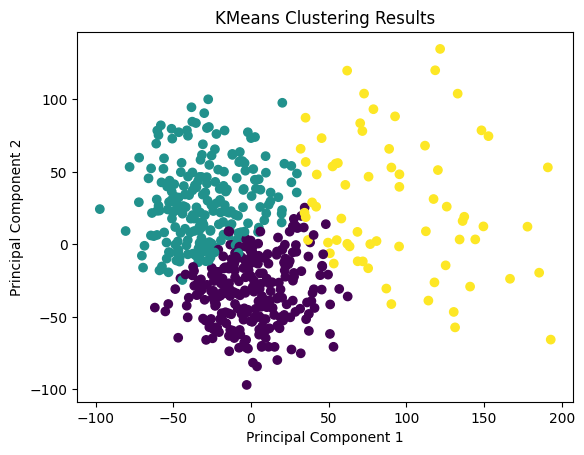

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(embedding_pca)

# Get cluster labels
labels = kmeans.labels_


# Plot results
plt.scatter(embedding_pca[:, 0], embedding_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering Results')
plt.show()

/data/space1/BooleanLab/Atishna/ece204_project1/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


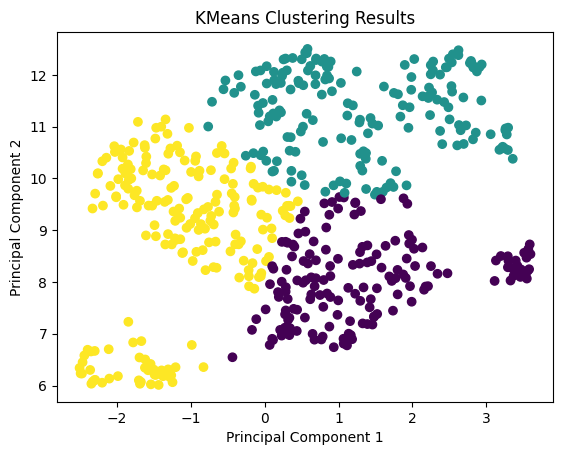

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(embedding_umap)

# Get cluster labels
labels = kmeans.labels_


# Plot results
plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering Results')
plt.show()

/data/space1/BooleanLab/Atishna/ece204_project1/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


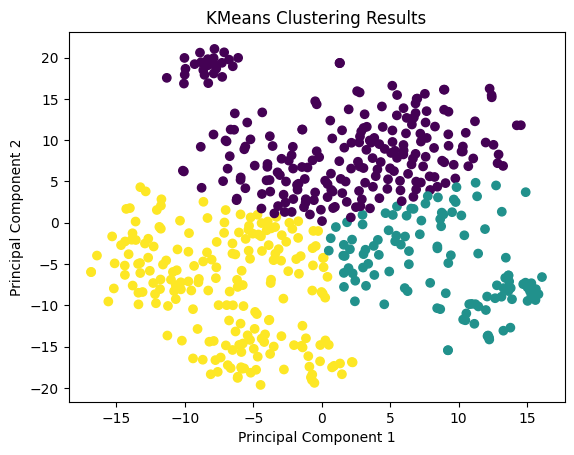

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(embedding_tsne)

# Get cluster labels
labels = kmeans.labels_


# Plot results
plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering Results')
plt.show()

/data/space1/BooleanLab/Atishna/ece204_project1/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


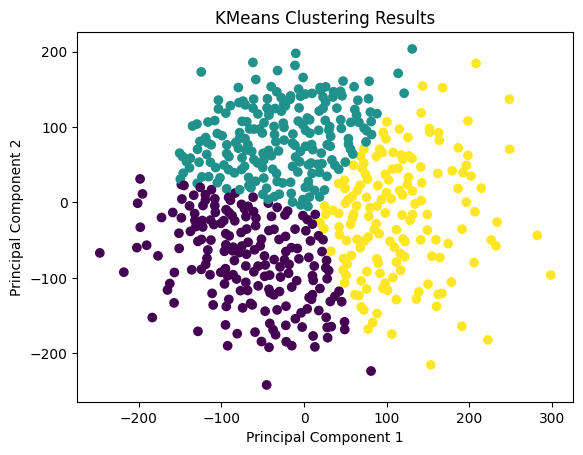

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(embedding_mds)

# Get cluster labels
labels = kmeans.labels_


# Plot results
plt.scatter(embedding_mds[:, 0], embedding_mds[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering Results')
plt.show()

/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


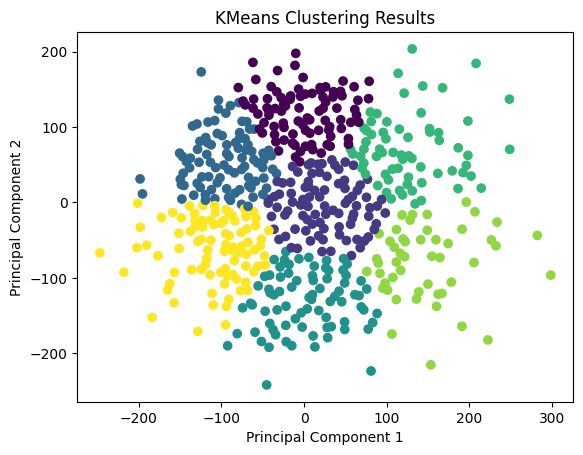

In [80]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Fit KMeans model
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(embedding_mds)

# Get cluster labels
labels = kmeans.labels_


# Plot results
plt.scatter(embedding_mds[:, 0], embedding_mds[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering Results')
plt.show()

<Axes: >

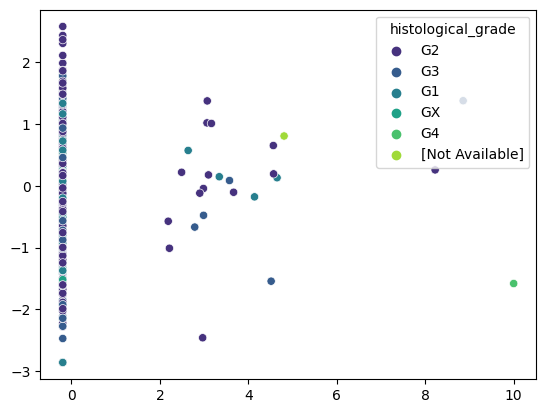

In [23]:
sns.scatterplot(x=adata.X[:,0], y=adata.X[:,1], hue=metadata['histological_grade'], legend='full', palette='viridis')

In [33]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

columns = ['age_at_initial_pathologic_diagnosis', 'gender', 'race', 'ajcc_pathologic_tumor_stage', 'histological_type']

# Normalize the data
scaler = StandardScaler()
#pd.Categorical(true_labels).codes
metadata_norm = scaler.fit_transform(pd.Categorical(meta['ajcc_pathologic_tumor_stage']).codes.reshape(-1, 1))

# Compute the silhouette score
score = silhouette_score(metadata_norm, kmeans_pca)
print("Silhouette Score:", score)

Silhouette Score: -0.12029834422232524


In [34]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

columns = ['age_at_initial_pathologic_diagnosis', 'gender', 'race', 'ajcc_pathologic_tumor_stage', 'histological_type']

# Normalize the data
scaler = StandardScaler()
#pd.Categorical(true_labels).codes
metadata_norm = scaler.fit_transform(pd.Categorical(meta['histological_type']).codes.reshape(-1, 1))

# Compute the silhouette score
score = silhouette_score(metadata_norm, kmeans_pca)
print("Silhouette Score:", score)

Silhouette Score: -0.27413990825688067


In [36]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

columns = ['age_at_initial_pathologic_diagnosis', 'gender', 'race', 'ajcc_pathologic_tumor_stage', 'histological_type']

# Normalize the data
scaler = StandardScaler()
#pd.Categorical(true_labels).codes
metadata_norm = scaler.fit_transform(pd.Categorical(meta['histological_type']).codes.reshape(-1, 1))

# Compute the silhouette score
score = silhouette_score(metadata_norm, kmeans_mds)
print("Silhouette Score:", score)

Silhouette Score: -0.39214703274206775


In [37]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

columns = ['age_at_initial_pathologic_diagnosis', 'gender', 'race', 'ajcc_pathologic_tumor_stage', 'histological_type']

# Normalize the data
scaler = StandardScaler()
#pd.Categorical(true_labels).codes
metadata_norm = scaler.fit_transform(pd.Categorical(meta['histological_type']).codes.reshape(-1, 1))

# Compute the silhouette score
score = silhouette_score(metadata_norm, kmeans_tsne)
print("Silhouette Score:", score)

Silhouette Score: -0.39238095241535254


In [35]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

columns = ['age_at_initial_pathologic_diagnosis', 'gender', 'race', 'ajcc_pathologic_tumor_stage', 'histological_type']

# Normalize the data
scaler = StandardScaler()
#pd.Categorical(true_labels).codes
metadata_norm = scaler.fit_transform(pd.Categorical(meta['histological_type']).codes.reshape(-1, 1))

# Compute the silhouette score
score = silhouette_score(metadata_norm, kmeans_umap)
print("Silhouette Score:", score)

Silhouette Score: -0.5623089856183063


In [38]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

columns = ['age_at_initial_pathologic_diagnosis', 'gender', 'race', 'ajcc_pathologic_tumor_stage', 'histological_type']

# Normalize the data
scaler = StandardScaler()
#pd.Categorical(true_labels).codes
metadata_norm = scaler.fit_transform(pd.Categorical(meta['histological_type']).codes.reshape(-1, 1))

# Compute the silhouette score
score = silhouette_score(metadata_norm, hc_umap)
print("Silhouette Score:", score)

Silhouette Score: -0.6227544260881902


In [39]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

columns = ['age_at_initial_pathologic_diagnosis', 'gender', 'race', 'ajcc_pathologic_tumor_stage', 'histological_type']

# Normalize the data
scaler = StandardScaler()
#pd.Categorical(true_labels).codes
metadata_norm = scaler.fit_transform(pd.Categorical(meta['histological_type']).codes.reshape(-1, 1))

# Compute the silhouette score
score = silhouette_score(metadata_norm, spc_umap)
print("Silhouette Score:", score)

Silhouette Score: -0.7971386687622096


In [42]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

columns = ['age_at_initial_pathologic_diagnosis', 'gender', 'race', 'ajcc_pathologic_tumor_stage', 'histological_type']

# Normalize the data
scaler = StandardScaler()
#pd.Categorical(true_labels).codes
metadata_norm = scaler.fit_transform(pd.Categorical(meta['histological_type']).codes.reshape(-1, 1))

# Compute the silhouette score
score = silhouette_score(metadata_norm, hdbscan_umap)
print("Silhouette Score:", score)

Silhouette Score: -0.8473371170890999


In [43]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

columns = ['age_at_initial_pathologic_diagnosis', 'gender', 'race', 'ajcc_pathologic_tumor_stage', 'histological_type']

# Normalize the data
scaler = StandardScaler()
#pd.Categorical(true_labels).codes
metadata_norm = scaler.fit_transform(pd.Categorical(meta['histological_type']).codes.reshape(-1, 1))

# Compute the silhouette score
score = silhouette_score(metadata_norm, gmm_umap)
print("Silhouette Score:", score)

Silhouette Score: -0.5751270316299998


In [46]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

columns = ['age_at_initial_pathologic_diagnosis', 'gender', 'race', 'ajcc_pathologic_tumor_stage', 'histological_type']

# Normalize the data
scaler = StandardScaler()
#pd.Categorical(true_labels).codes
metadata_norm = scaler.fit_transform(pd.Categorical(meta['histological_grade']).codes.reshape(-1, 1))

# Compute the silhouette score
score = silhouette_score(metadata_norm, kmeans_umap)
print("Silhouette Score:", score)

Silhouette Score: -0.09355584623975995


In [ ]:
import sys 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from openTSNE import TSNE
import umap

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
import hdbscan
from sklearn import mixture

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score

from time import time
import seaborn as sns
filename = 'graph.csv'
# set the number of clusters as the number of groups in data
num_clusters = 5


# K-means
km = KMeans(n_clusters = num_clusters, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
kmeans_umap = km.fit_predict(embedding_umap)
kmeans_tsne = km.fit_predict(embedding_tsne)
kmeans_mds = km.fit_predict(embedding_mds)
kmeans_pca = km.fit_predict(embedding_pca)

# Hierarchical clustering:  AgglomerativeClustering
clusterer_hierarchical = AgglomerativeClustering(n_clusters = num_clusters )
hc_umap = clusterer_hierarchical.fit_predict(embedding_umap)
hc_tsne = clusterer_hierarchical.fit_predict(embedding_tsne)
hc_mds = clusterer_hierarchical.fit_predict(embedding_mds)
hc_pca = clusterer_hierarchical.fit_predict(embedding_pca)

# SpectralClustering
spectral_Clustering = SpectralClustering(n_clusters = num_clusters, assign_labels="discretize", random_state=0)
spc_umap = spectral_Clustering.fit_predict(embedding_umap)
spc_tsne = spectral_Clustering.fit_predict(embedding_tsne)
spc_mds = spectral_Clustering.fit_predict(embedding_mds)
spc_pca = spectral_Clustering.fit_predict(embedding_pca)

# Gaussian mixture model
gmm = mixture.GaussianMixture(n_components = num_clusters, covariance_type='spherical', reg_covar=1e-4)
gmm_umap = gmm.fit_predict(embedding_umap)
gmm_tsne = gmm.fit_predict(embedding_tsne)
gmm_mds = gmm.fit_predict(embedding_mds)
gmm_pca = gmm.fit_predict(embedding_pca)


# HDBSCAN
clusterer_hdbscan = hdbscan.HDBSCAN(min_cluster_size = 10, gen_min_span_tree=True)
hdbscan_umap = clusterer_hdbscan.fit_predict(embedding_umap)
hdbscan_tsne = clusterer_hdbscan.fit_predict(embedding_tsne)
hdbscan_mds = clusterer_hdbscan.fit_predict(embedding_mds)
hdbscan_pca = clusterer_hdbscan.fit_predict(embedding_pca)

#clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', edge_alpha=0.6, node_size=80, edge_linewidth=2)
#clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
#clusterer.condensed_tree_.plot()

cluster_result = [kmeans_umap,kmeans_tsne,kmeans_mds,kmeans_pca, 
                  hc_umap,hc_tsne,hc_mds,hc_pca,
                  spc_umap,spc_tsne,spc_mds,spc_pca,
                  gmm_umap,gmm_tsne,gmm_mds,gmm_pca,
                  hdbscan_umap,hdbscan_tsne,hdbscan_mds,hdbscan_pca]


In [111]:
kmeans = KMeans(n_clusters=7).fit_predict(adata.obsm["umap"])
print(silhouette_score(adata.obsm["umap"], kmeans))
clusterer_hierarchical = AgglomerativeClustering(n_clusters = 7).fit_predict(adata.obsm["umap"])
print(silhouette_score(adata.obsm["umap"], clusterer_hierarchical))
spectral_Clustering = SpectralClustering(n_clusters = 7).fit_predict(adata.obsm["umap"])
print(silhouette_score(adata.obsm["umap"], spectral_Clustering))
gmm = mixture.GaussianMixture(n_components = 7).fit_predict(adata.obsm["umap"])
print(silhouette_score(adata.obsm["umap"], gmm))
clusterer_hdbscan = hdbscan.HDBSCAN(min_cluster_size = 7).fit_predict(adata.obsm["umap"])
print(silhouette_score(adata.obsm["umap"], clusterer_hdbscan))

/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.48163313
0.46594062
0.4580641
0.4739896
0.2476447


In [120]:
kmeans = KMeans(n_clusters=7).fit_predict(adata.obsm["umap"])
silhouette_score(adata.obsm["umap"], kmeans)

/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.48029304

In [112]:
kmeans = KMeans(n_clusters=7).fit_predict(adata.obsm["tsne"])
print(silhouette_score(adata.obsm["tsne"], kmeans))
clusterer_hierarchical = AgglomerativeClustering(n_clusters = 7).fit_predict(adata.obsm["tsne"])
print(silhouette_score(adata.obsm["tsne"], clusterer_hierarchical))
spectral_Clustering = SpectralClustering(n_clusters = 7).fit_predict(adata.obsm["tsne"])
print(silhouette_score(adata.obsm["tsne"], spectral_Clustering))
gmm = mixture.GaussianMixture(n_components = 7).fit_predict(adata.obsm["tsne"])
print(silhouette_score(adata.obsm["tsne"], gmm))
clusterer_hdbscan = hdbscan.HDBSCAN(min_cluster_size = 7).fit_predict(adata.obsm["tsne"])
print(silhouette_score(adata.obsm["tsne"], clusterer_hdbscan))

/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.43268022
0.38490242
0.038834833
0.41697946
0.17344864


In [113]:
kmeans = KMeans(n_clusters=7).fit_predict(adata.obsm["mds"])
print(silhouette_score(adata.obsm["mds"], kmeans))
clusterer_hierarchical = AgglomerativeClustering(n_clusters = 7).fit_predict(adata.obsm["mds"])
print(silhouette_score(adata.obsm["mds"], clusterer_hierarchical))
spectral_Clustering = SpectralClustering(n_clusters = 7).fit_predict(adata.obsm["mds"])
print(silhouette_score(adata.obsm["mds"], spectral_Clustering))
gmm = mixture.GaussianMixture(n_components = 7).fit_predict(adata.obsm["mds"])
print(silhouette_score(adata.obsm["mds"], gmm))
clusterer_hdbscan = hdbscan.HDBSCAN(min_cluster_size = 7).fit_predict(adata.obsm["mds"])
print(silhouette_score(adata.obsm["mds"], clusterer_hdbscan))

/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


0.33717433
0.2746031
-0.15712011
0.32373157
0.009185415


/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  est = KMeans(


In [114]:
kmeans = KMeans(n_clusters=7).fit_predict(adata.obsm["pca"])
print(silhouette_score(adata.obsm["pca"], kmeans))
clusterer_hierarchical = AgglomerativeClustering(n_clusters = 7).fit_predict(adata.obsm["pca"])
print(silhouette_score(adata.obsm["pca"], clusterer_hierarchical))
spectral_Clustering = SpectralClustering(n_clusters = 7).fit_predict(adata.obsm["pca"])
print(silhouette_score(adata.obsm["pca"], spectral_Clustering))
gmm = mixture.GaussianMixture(n_components = 7).fit_predict(adata.obsm["pca"])
print(silhouette_score(adata.obsm["pca"], gmm))
clusterer_hdbscan = hdbscan.HDBSCAN(min_cluster_size = 7).fit_predict(adata.obsm["pca"])
print(silhouette_score(adata.obsm["pca"], clusterer_hdbscan))

/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.044381455
0.029471798


/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


-0.11836545
0.048303895
-0.11360475


In [130]:
from anndata import read_h5ad
adata = read_h5ad('data/TCGA.HNSC.embedded.h5ad')
kmeans = KMeans(n_clusters=7).fit_predict(adata.obsm["pca"])
silhouette_score(adata.obsm["pca"], kmeans)

/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.0447077

In [60]:
clusterer_hierarchical = AgglomerativeClustering(n_clusters = 7).fit_predict(adata.obsm["umap"])
silhouette_score(adata.obsm["umap"], clusterer_hierarchical)

0.46594062

In [61]:
spectral_Clustering = SpectralClustering(n_clusters = 7).fit_predict(adata.obsm["umap"])
silhouette_score(adata.obsm["umap"], spectral_Clustering)

0.4580641

In [62]:
gmm = mixture.GaussianMixture(n_components = 7).fit_predict(adata.obsm["umap"])
silhouette_score(adata.obsm["umap"], gmm)

0.46076247

In [73]:
clusterer_hdbscan = hdbscan.HDBSCAN(min_cluster_size = 7).fit_predict(adata.obsm["umap"])
silhouette_score(adata.obsm["umap"], clusterer_hdbscan)

0.2476447

In [88]:
kmeans = KMeans(n_clusters=7).fit_predict(adata.obsm["umap"])
#normalized_mutual_info_score(adata.obsm["umap"],kmeans)
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score

# Cluster UMAP embeddings with KMeans
kmeans = KMeans(n_clusters=6).fit_predict(adata.obsm["pca"])

# Get cell types from metadata
metadata_labels = metadata["histological_grade"].values

# Compute normalized mutual information score
ari = adjusted_rand_score(metadata_labels, kmeans)
print("ari:", ari)


/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ari: 0.022096533788312892


In [96]:
metadata["ajcc_pathologic_tumor_stage"].nunique()

8

In [76]:
print(adata.obsm["umap"].shape)


(545, 2)


In [102]:
adata=adata[adata.obs["ajcc_pathologic_tumor_stage"] != "[Not Available]"]
adata
#normalized_mutual_info_score(adata.obsm["umap"],kmeans)
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score

# Cluster UMAP embeddings with KMeans
kmeans = KMeans(n_clusters=7).fit_predict(adata.obsm["umap"])

# Get cell types from metadata
metadata_labels =adata.obs["ajcc_pathologic_tumor_stage"].values

# Compute normalized mutual information score
ari = adjusted_rand_score(metadata_labels, kmeans)
print("ari:", ari)

nmi = normalized_mutual_info_score(metadata_labels, kmeans)
print("nmi:", nmi)

ari: 0.01067583341745503
nmi: 0.045565361996001176


/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


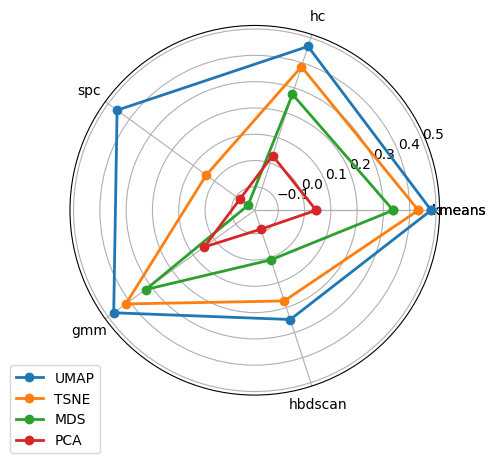

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of variables we want to plot
categories = ['kmeans', 'hc', 'spc', 'gmm', 'hbdscan']

# Define the scores
scores = [[0.48163313,0.46594062,0.4580641,0.4739896,0.2476447],
          [0.43268022,0.38490242,0.038834833,0.41697946,0.17344864],
          [0.33717433,0.2746031,-0.15712011,0.32373157,0.009185415],
          [0.044381455,0.029471798,-0.11836545,0.048303895,-0.11360475]]

# Calculate the angles for each category
angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)

# Make a full circle, with the first and last angles overlapping
angles = np.concatenate((angles, [angles[0]]))

# Initialize the plot
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

# Add each score as a separate line
for i in range(len(scores)):
    # Duplicate the first score to create a closed loop
    scores[i].append(scores[i][0])
    
    # Add the plot for each score
    ax.plot(angles, scores[i], 'o-', linewidth=2, label="UMAP" if i == 0 else "TSNE" if i == 1 else "MDS" if i ==2 else "PCA")

# Add labels and legends
ax.set_thetagrids(angles * 180/np.pi, np.concatenate((categories,[categories[0]])))
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


In [9]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from openTSNE import TSNE
import umap

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
import hdbscan
from sklearn import mixture

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score

from time import time
import seaborn as sns
filename = 'graph.csv'
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
def test_kmeans(n_clusters, n_components):
	kmeans = KMeans(n_clusters=n_clusters).fit_predict(adata.obsm["pca"][:, :n_components])
	return silhouette_score(adata.obsm["pca"][:, :n_components], kmeans)

/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
from anndata import read_h5ad
adata = read_h5ad('data/TCGA.HNSC.embedded.h5ad')
test_kmeans(6,1)

/home/gputest/.conda/envs/ece204/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.54619074